# Experiment 1

Experiment 1 aims to explore the effect of swarm type on the percentage of the pipe network that is covered by the swarm.

In [1]:
# import random
# random.seed(0)

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")
print(f"Number of links: {len(g.edges)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97
Number of links: 119


In [4]:
# # Demo simulations with render turned on - for the other simulations, 
# # render will be turned off as it takes a long time to render simulations

# sim = Simulation(env, 10, False, start_positions=['River'], filepath="notable-results/Experiment-1/RenderDemos")
# sim.run(max_turns=100)
# r = Render(sim)
# r.render()

# sim = Simulation(env, 10, True, swarm_config={'swarm': True, 'swarm_type': 'naive'}, start_positions=['River'], filepath="notable-results/Experiment-1/RenderDemos")
# sim.run(max_turns=100)
# r = Render(sim)
# r.render()

# sim = Simulation(env, 10, True, swarm_config={'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}, start_positions=['River'], filepath="notable-results/Experiment-1/RenderDemos")
# sim.run(max_turns=100)
# r = Render(sim)
# r.render()

# sim = Simulation(env, 10, True, swarm_config={'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}, start_positions=['River'], filepath="notable-results/Experiment-1/RenderDemos")
# sim.run(max_turns=100)
# r = Render(sim)
# r.render()

## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [5]:
start_nodes = start_pool[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes}")

Start nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


# Function Definitions

In [6]:
# Function to filter simulation results
def filter_results(dataframe, simulations, data_of_interest):
    # Get the results from each simulation
    for start_node, path in simulations:
        # Read the simulation results csv file
        temp = pd.read_csv(f'{path}/results.csv')
        
        # Drop all the columns except the data of interest and turns
        temp = temp[['turn', data_of_interest]]
        
        # Transpose the dataframe
        temp = temp.T
        
        # Set the turns as the column names
        temp.columns = temp.iloc[0].astype(int)
        
        # Drop the turns row
        temp = temp.drop('turn')
        
        # Add the start node as a column
        temp['start_node'] = start_node
        
        # If the dataframe is empty, set it to the temp dataframe
        if dataframe.empty:
            dataframe = temp
        # Else, append the temp dataframe to the dataframe
        else:
            dataframe = pd.concat([dataframe, temp])
            
    # Create rows with the mean, max and min of each column
    dataframe.loc['mean'] = dataframe.mean(numeric_only=True, axis=0)
    dataframe.loc['max'] = dataframe.max(numeric_only=True, axis=0)
    dataframe.loc['min'] = dataframe.min(numeric_only=True, axis=0)
    
    # Return the dataframe
    return dataframe

### Experiment 1.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NoSwarm

In [7]:
simulations_1_1 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-1/NoSwarm")
    simulations_1_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_1}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NoSwarm/simulation_20230329_123225'), ('35', 'notable-results/Experiment-1/NoSwarm/simulation_20230329_123226'), ('131', 'notable-results/Experiment-1/NoSwarm/simulation_20230329_123227'), ('166', 'notable-results/Experiment-1/NoSwarm/simulation_20230329_123228'), ('167', 'notable-results/Experiment-1/NoSwarm/simulation_20230329_123229'), ('2

#### Experiment 1.1.1

Examine the percentage of nodes explored by the agents.

In [8]:
df_1_1_1 = pd.DataFrame()
df_1_1_1 = filter_results(df_1_1_1, simulations_1_1, 'pct_nodes_explored')

#### Experiment 1.1.2

Examines the percentage of links explored by the agents.

In [9]:
df_1_1_2 = pd.DataFrame()
df_1_1_2 = filter_results(df_1_1_2, simulations_1_1, 'pct_links_explored')

### Experiment 1.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NaiveSwarm

In [10]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_1_2 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/NaiveSwarm")
    simulations_1_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_2}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230329_123237'), ('35', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230329_123237'), ('131', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230329_123238'), ('166', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230329_123238'), ('167', 'notable-results/Experiment-1/NaiveSwarm/simulation_2023032

#### Experiment 1.2.1

Examines the percentage of nodes explored by the agents.

In [11]:
df_1_2_1 = pd.DataFrame()
df_1_2_1 = filter_results(df_1_2_1, simulations_1_2, 'pct_nodes_explored')

#### Experiment 1.2.2

Examines the percentage of links explored by the agents.

In [12]:
df_1_2_2 = pd.DataFrame()
df_1_2_2 = filter_results(df_1_2_2, simulations_1_2, 'pct_links_explored')

### Experiment 1.3
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMeanSwarm

In [13]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_1_3 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMeanSwarm")
    simulations_1_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_3}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230329_123247'), ('35', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230329_123248'), ('131', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230329_123248'), ('166', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230329_123249'), ('167', 'notable-results/Experiment-1/I

#### Experiment 1.3.1

Examines the percentage of nodes explored by the agents.

In [14]:
df_1_3_1 = pd.DataFrame()
df_1_3_1 = filter_results(df_1_3_1, simulations_1_3, 'pct_nodes_explored')

#### Experiment 1.3.2

Examines the percentage of links explored by the agents.

In [15]:
df_1_3_2 = pd.DataFrame()
df_1_3_2 = filter_results(df_1_3_2, simulations_1_3, 'pct_links_explored')

### Experiment 1.4
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMedianSwarm

In [16]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_1_4 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMedianSwarm")
    simulations_1_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_4}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230329_123258'), ('35', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230329_123259'), ('131', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230329_123300'), ('166', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230329_123301'), ('167', 'notable-results/Experi

#### Experiment 1.4.1

Examines the percentage of nodes explored

In [17]:
df_1_4_1 = pd.DataFrame()
df_1_4_1 = filter_results(df_1_4_1, simulations_1_4, 'pct_nodes_explored')

#### Experiment 1.4.2

Examines the percentage of links explored

In [18]:
df_1_4_2 = pd.DataFrame()
df_1_4_2 = filter_results(df_1_4_2, simulations_1_4, 'pct_links_explored')

## Analysis

In [19]:
# Function to create a dataframe with the results of the experiment
from typing import List

def create_dataframe(swarm_types:list, experiment_dataframes:List[pd.DataFrame]):
    # Create a new dataframe
    df = pd.DataFrame()
    # Zip the swarm types and the dataframes together
    for swarm_type, dataframe in zip(swarm_types, experiment_dataframes):
        df[f'{swarm_type}-mean'] = dataframe.loc['mean']
        df[f'{swarm_type}-max'] = dataframe.loc['max']
        df[f'{swarm_type}-min'] = dataframe.loc['min']
        
    # Drop any columns that are all NaN
    df = df.dropna(axis=1, how='all')
    
    # Drop any rows that are all NaN
    df = df.dropna(axis=0, how='all')
        
    # Return the dataframe
    return df

# Function to plot the error bars
def plot_errorbar(df, swarm_type, ax, color, label, errorevery):
    ax.errorbar(
        df.index,
        df[f'{swarm_type}-mean'],
        yerr=[df[f'{swarm_type}-mean'] - df[f'{swarm_type}-min'], df[f'{swarm_type}-max'] - df[f'{swarm_type}-mean']],
        errorevery=errorevery,
        label=label,
        color=color,
        capsize=5)
    
# Function to fill in the area between the error bars
def fill_area_between_min_and_max(dataframe, swarm_type, ax, colour='lightblue', alpha=0.3):
    x = dataframe.index.astype(int)
    y1 = dataframe[f'{swarm_type}-min'].astype(float)
    y2 = dataframe[f'{swarm_type}-max'].astype(float)
        
    ax.fill_between(x, y1, y2, color=colour, alpha=alpha)
 
# Function to plot the variance of the percentage explored (max - min for each turn)   
def plot_variance(dataframe:pd.DataFrame, metric:str):
    no_swarm_variance = dataframe['no-swarm-max'] - dataframe['no-swarm-min']
    naive_swarm_variance = dataframe['naive-max'] - dataframe['naive-min']
    informed_mean_swarm_variance = dataframe['informed-mean-max'] - dataframe['informed-mean-min']
    informed_median_swarm_variance = dataframe['informed-median-max'] - dataframe['informed-median-min']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(dataframe.index, no_swarm_variance, color='black', label='No Swarm')
    ax.plot(dataframe.index, naive_swarm_variance, color='blue', label='Naive Swarm')
    ax.plot(dataframe.index, informed_mean_swarm_variance, color='green', label='Informed Swarm (Mean)')
    ax.plot(dataframe.index, informed_median_swarm_variance, color='red', label='Informed Swarm (Median)')
    
    if metric.lower().strip() == 'nodes':
        ax.set_title("Variance of Percentage of Nodes Explored by Turn")
    elif metric.lower().strip() == 'links':
        ax.set_title("Variance of Percentage of Links Explored by Turn")
        
    ax.set_xlabel("Turn")
    ax.set_ylabel("Variance")
    
    ax.legend()
    
    ax.set_ylim(0, 100)
    
    plt.show()

### Experiment 1.X.1 - Nodes Explored by Agents Analysis

In [20]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_1_1_1, df_1_2_1, df_1_3_1, df_1_4_1]

experiment_1_1_results = create_dataframe(swarm_types, experiment_dataframes)

# experiment_1_1_results

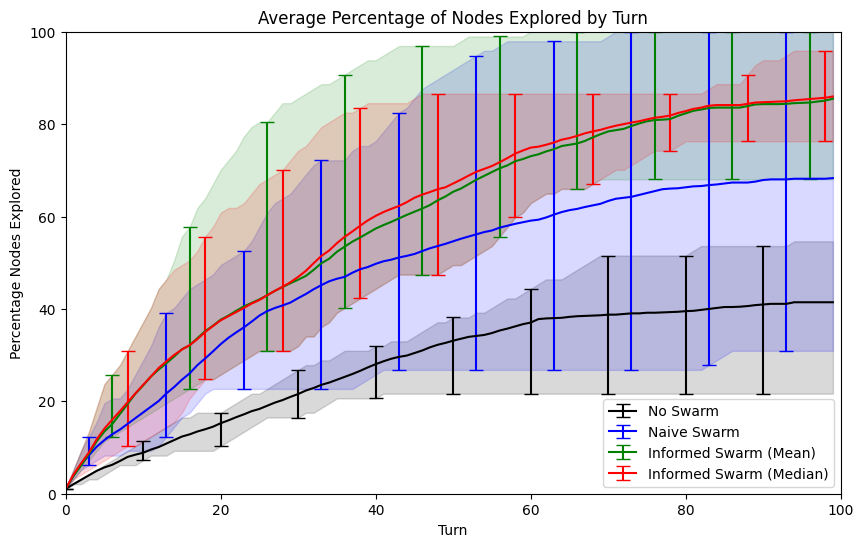

In [21]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
plot_errorbar(experiment_1_1_results, 'no-swarm', ax, 'black', 'No Swarm', errorevery=(0,10))

# Plot the naive swarm results with error bars
plot_errorbar(experiment_1_1_results, 'naive', ax, 'blue', 'Naive Swarm', errorevery=(3,10))

# Plot the informed swarm results
plot_errorbar(experiment_1_1_results, 'informed-mean', ax, 'green', 'Informed Swarm (Mean)', errorevery=(6,10))

# Plot the informed swarm results
plot_errorbar(experiment_1_1_results, 'informed-median', ax, 'red', 'Informed Swarm (Median)', errorevery=(8,10))
    
# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max(experiment_1_1_results, 'no-swarm', ax, colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max(experiment_1_1_results, 'naive', ax, colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max(experiment_1_1_results, 'informed-mean', ax, colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max(experiment_1_1_results, 'informed-median', ax, colour='red', alpha=0.15)

# Set the title and labels
ax.set_title("Average Percentage of Nodes Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Nodes Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

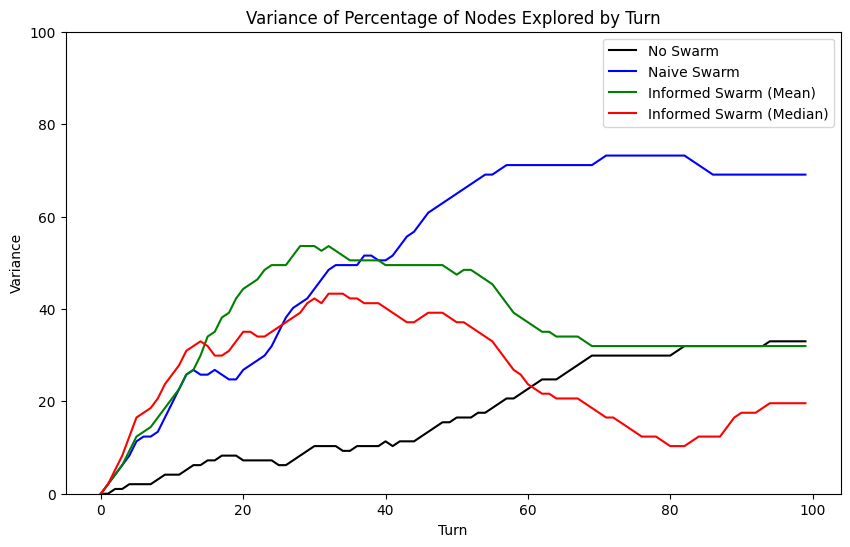

In [22]:
plot_variance(experiment_1_1_results, 'nodes')

### Experiment 1.X.2 - No Swarm - Links Explored by Agents Analysis

In [23]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_1_1_2, df_1_2_2, df_1_3_2, df_1_4_2]

experiment_1_2_results = create_dataframe(swarm_types, experiment_dataframes)

# experiment_1_2_results

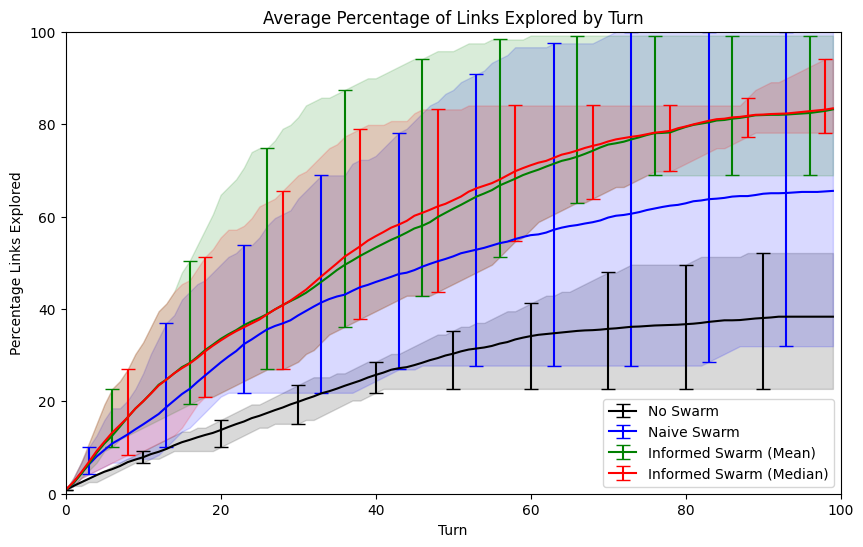

In [24]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
plot_errorbar(experiment_1_2_results, 'no-swarm', ax, 'black', 'No Swarm', errorevery=(0,10))

# Plot the naive swarm results with error bars
plot_errorbar(experiment_1_2_results, 'naive', ax, 'blue', 'Naive Swarm', errorevery=(3,10))

# Plot the informed swarm results
plot_errorbar(experiment_1_2_results, 'informed-mean', ax, 'green', 'Informed Swarm (Mean)', errorevery=(6,10))

# Plot the informed swarm results
plot_errorbar(experiment_1_2_results, 'informed-median', ax, 'red', 'Informed Swarm (Median)', errorevery=(8,10))

# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max(experiment_1_2_results, 'no-swarm', ax, colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max(experiment_1_2_results, 'naive', ax, colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max(experiment_1_2_results, 'informed-mean', ax, colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max(experiment_1_2_results, 'informed-median', ax, colour='red', alpha=0.15)

# Set the title and labels
ax.set_title("Average Percentage of Links Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Links Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

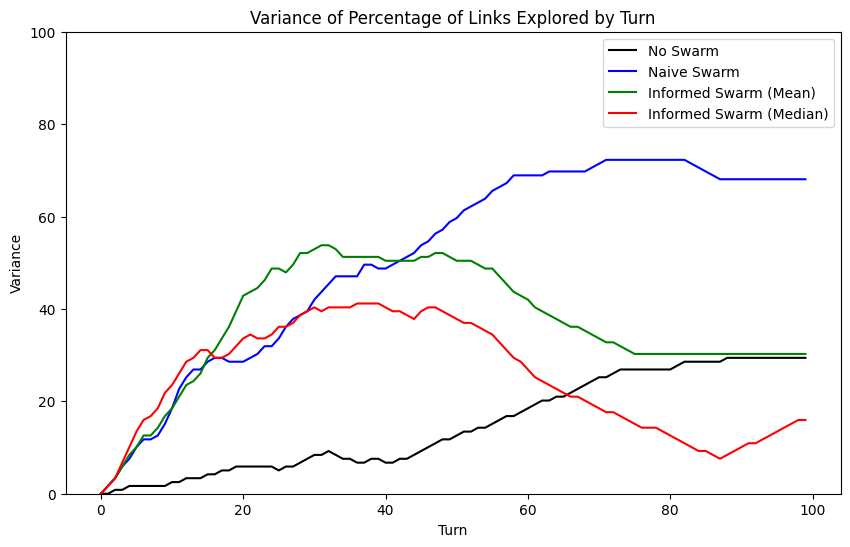

In [25]:
plot_variance(experiment_1_2_results, 'links')

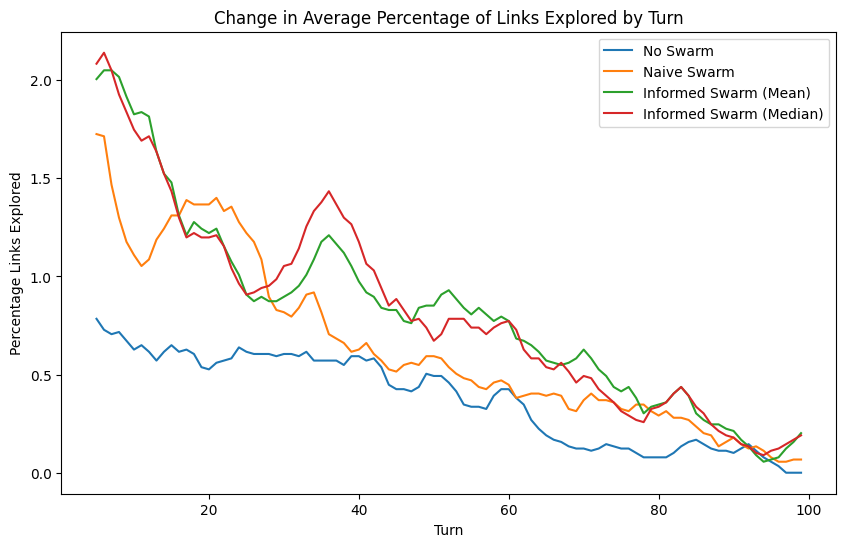

In [36]:
# Plot the change in the average percentage of links explored by turn
fig, ax = plt.subplots(figsize=(10, 6))

no_swarm_mean_diff = experiment_1_2_results['no-swarm-mean'].diff()
naive_mean_diff = experiment_1_2_results['naive-mean'].diff()
informed_mean_mean_diff = experiment_1_2_results['informed-mean-mean'].diff()
informed_median_mean_diff = experiment_1_2_results['informed-median-mean'].diff()

# Smooth the data
no_swarm_mean_diff = no_swarm_mean_diff.rolling(window=5).mean()
naive_mean_diff = naive_mean_diff.rolling(window=5).mean()
informed_mean_mean_diff = informed_mean_mean_diff.rolling(window=5).mean()
informed_median_mean_diff = informed_median_mean_diff.rolling(window=5).mean()

plt.plot(no_swarm_mean_diff, label='No Swarm')
plt.plot(naive_mean_diff, label='Naive Swarm')
plt.plot(informed_mean_mean_diff, label='Informed Swarm (Mean)')
plt.plot(informed_median_mean_diff, label='Informed Swarm (Median)')

plt.title("Change in Average Percentage of Links Explored by Turn")
plt.xlabel("Turn")
plt.ylabel("Percentage Links Explored")

plt.legend()

plt.show()